In [1]:
#INSTALLS

!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install opencv-python

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from PIL import Image as im
import cv2 as cv

In [2]:
#DOWNLOAD VIDEO

#For each camera recording, we extract the videos from mat files
from scipy.io import loadmat
Mat1 = loadmat('cam1_1.mat')
Mat2 = loadmat('cam2_1.mat')
Mat3 = loadmat('cam3_1.mat')

In [3]:
#We convert the data into python arrays
dataMat1 = Mat1["vidFrames1_1"]
dataMat2 = Mat2["vidFrames2_1"]
dataMat3 = Mat3["vidFrames3_1"]

In [4]:
#We determine the dimensions of each of the cameras to see what dimensions our data matrix have
print(dataMat1.shape)
print(dataMat2.shape)
print(dataMat3.shape)

(480, 640, 3, 226)
(480, 640, 3, 284)
(480, 640, 3, 232)


In [5]:
#MOTION TRACKING

#We write the videos necessary to capture the motion from each video

#ANGLE 1:

height, width,_,nbFrames = dataMat1.shape
codec_id = "mp4v" # ID for a video codec.
fourcc = cv.VideoWriter_fourcc(*codec_id)
filename = "video1.mp4"
out = cv.VideoWriter(filename, fourcc=fourcc, fps=20, frameSize=(width, height))


for i in range(nbFrames):
    out.write(dataMat1[:,:,:,i])
    
 
#ANGLE 2:

    height, width,_,nbFrames = dataMat2.shape
codec_id = "mp4v" # ID for a video codec.
fourcc = cv.VideoWriter_fourcc(*codec_id)
filename = "video2.mp4"
out = cv.VideoWriter(filename, fourcc=fourcc, fps=20, frameSize=(width, height))


for i in range(nbFrames):
    out.write(dataMat2[:,:,:,i])


In [28]:
#ANGLE 3:

height, width,_,nbFrames = dataMat3.shape
codec_id = "mp4v" # ID for a video codec.
fourcc = cv.VideoWriter_fourcc(*codec_id)
filename = "video3.mp4"
out = cv.VideoWriter(filename, fourcc=fourcc, fps=20, frameSize=(width, height))


for i in range(nbFrames):
    out.write(dataMat3[:,:,:,i])

In [7]:
#Here we declare the matrix that will store our x and y coordinates
x_y_coordinateMatrix1 = np.zeros((0,225))
x_y_coordinateMatrix2 = np.zeros((0,225))
x_y_coordinateMatrix3 = np.zeros((0,225))

In [8]:
#Now we can set up the motion tracking 
#We set up a dictionary of legacy motion trackers in opencv

tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'CSRT']
tracker_type = tracker_types[1]

if tracker_type == 'BOOSTING':
    tracker = cv.legacy.TrackerBoosting_create()
if tracker_type == 'MIL':
    tracker = cv.TrackerMIL_create() 
if tracker_type == 'KCF':
    tracker = cv.TrackerKCF_create() 
if tracker_type == 'TLD':
    tracker = cv.legacy.TrackerTLD_create() 
if tracker_type == 'MEDIANFLOW':
    tracker = cv.legacy.TrackerMedianFlow_create() 
#if tracker_type == "CSRT":
    #tracker = cv.TrackerCSRT_create()

In [81]:
#VIDEO 1

#The code below allows us to manually draw a rectangle that will track the motion of the bucket 

v1 = cv.VideoCapture('video1.mp4')
ret, frame = v1.read()
cv.imshow('frame',frame)
bb = cv.selectROI(frame)
tracker.init(frame,bb)



In [ ]:
#Displaying and storing the traking data into arrays

x_coordinates1 = np.zeros((226,1))
y_coordinates1 = np.zeros((226,1))
index = 0
while True:
    ret,frame = v1.read()
    if not ret:
        break
    (success,box) = tracker.update(frame)
    if success:
        (x,y,w,h) = [int(a) for a in box]
        cv.rectangle(frame,(x,y),(x+w,y+h),(250,0,250), 2)
        x_centerCoordinate = (x+w)/2
        y_centerCoordinate = (y+h)/2
        print(x_centerCoordinate,y_centerCoordinate)
        x_coordinates1[index] = x_centerCoordinate
        y_coordinates1[index] = y_centerCoordinate
    cv.imshow('Frame',frame)
    key = cv.waitKey(30)
    index = index+1
    if key == ord('q'):
        break

v1.release()
cv.destroyAllWindows()

201.5 165.0
201.5 165.0
201.5 165.0
201.5 165.0
201.5 165.0
201.5 165.0
201.5 165.0
201.5 162.0
202.0 162.0
202.0 162.0
202.5 164.0
202.5 164.0
203.5 169.0
203.5 169.0
203.5 175.0
203.0 183.5
203.0 183.5
203.0 192.0
203.0 192.0
201.5 201.0
202.5 201.0
202.0 209.5
202.5 217.0
201.0 216.5
201.0 221.5
201.0 221.5
201.0 223.5
201.0 223.5
200.5 224.5
201.0 224.0
201.0 223.5
201.0 220.5
201.0 220.5
201.0 215.5
201.0 215.5
201.5 208.5
201.5 199.5
201.5 199.5
201.5 191.0
201.5 191.0
201.0 183.5
201.0 183.0
201.5 175.5
201.5 169.5
201.5 169.5
201.0 165.5
202.0 165.5
202.0 163.5
201.0 163.5
202.0 163.0
202.0 165.5
201.5 165.5
201.5 170.0
201.5 170.0
202.0 176.5
202.0 176.5
202.0 184.0
202.5 193.0
202.5 193.0
202.5 201.5
201.5 202.0
202.0 210.0
202.0 210.0
202.0 216.5
202.5 221.0
202.0 221.5
201.5 224.0
202.5 224.0
202.0 224.5
202.0 224.5
202.0 223.5
202.0 220.0
202.0 220.0
202.0 214.5
202.0 214.5
201.5 207.5
201.5 207.5
201.0 199.5
201.0 199.5
200.5 191.5
200.0 182.5
200.0 182.5
200.0 175.5
200.

In [11]:
#Here we will resize our coordinate arrays so that they are an appropriate shape 
#since the camera take with the fewest number of frames generates 225 data points 

x_coordinates1 = np.resize(x_coordinates1,(225,1))
y_coordinates1 = np.resize(y_coordinates1,(225,1))

In [12]:
#Now we can reshape the coordinates to make them one long row

x_coordinates1 = np.reshape(x_coordinates1,(1,225))
y_coordinates1 = np.reshape(y_coordinates1,(1,225))

In [13]:
x_y_coordinateMatrix1 = np.append(x_y_coordinateMatrix1,x_coordinates1,axis=0)

In [14]:
x_y_coordinateMatrix1 = np.append(x_y_coordinateMatrix1,y_coordinates1,axis=0)

In [15]:
np.shape(x_y_coordinateMatrix1)

(2, 225)

In [16]:
x_y_coordinateMatrix1

array([[200. , 199.5, 199.5, 199.5, 199.5, 199.5, 199.5, 200. , 200.5,
        201. , 201. , 201. , 201. , 201. , 200.5, 200.5, 200.5, 200. ,
        200. , 199.5, 200. , 198.5, 197.5, 198. , 199.5, 199.5, 199. ,
        198.5, 198.5, 198.5, 199. , 198.5, 198. , 197.5, 198. , 198.5,
        199. , 199. , 199.5, 199.5, 199. , 199.5, 199. , 200. , 200. ,
        200. , 200. , 200. , 199.5, 199.5, 199.5, 200.5, 200.5, 200.5,
        200.5, 200.5, 200. , 201. , 201. , 201. , 201. , 201. , 201. ,
        201. , 200.5, 200.5, 200. , 200. , 200. , 200. , 200.5, 199.5,
        200. , 200. , 200. , 199.5, 199.5, 199.5, 199.5, 199. , 198.5,
        198.5, 198.5, 198.5, 198.5, 198.5, 197.5, 197.5, 197.5, 197.5,
        197.5, 197.5, 197.5, 197.5, 197. , 196.5, 197. , 197. , 196.5,
        197. , 197. , 197. , 197. , 197. , 197. , 196.5, 197.5, 197. ,
        197.5, 198. , 198. , 198. , 199. , 198.5, 199.5, 199.5, 199.5,
        199.5, 199.5, 200. , 200. , 200. , 200.5, 200. , 200. , 200. ,
      

In [17]:
#Now do the prevoius steps for the other two videos

In [18]:
#VIDEO 2

#The code below allows us to manually draw a rectangle that will track the motion of the bucket
 

v2 = cv.VideoCapture('video2.mp4')
ret, frame = v2.read()
cv.imshow('frame',frame)
bb = cv.selectROI(frame)
tracker.init(frame,bb)

In [19]:
#Displaying and storing the tracking data into arrays

x_coordinates2 = np.zeros((284,1))
y_coordinates2 = np.zeros((284,1))
index = 0
while True:
    ret,frame = v2.read()
    if not ret:
        break
    (success,box) = tracker.update(frame)
    if success:
        (x,y,w,h) = [int(a) for a in box]
        cv.rectangle(frame,(x,y),(x+w,y+h),(250,0,250), 2)
        x_centerCoordinate = (x+w)/2
        y_centerCoordinate = (y+h)/2
        print(x_centerCoordinate,y_centerCoordinate)
        x_coordinates2[index] = x_centerCoordinate
        y_coordinates2[index] = y_centerCoordinate
    cv.imshow('Frame',frame)
    key = cv.waitKey(30)
    index = index+1
    if key == ord('q'):
        break

v2.release()
cv.destroyAllWindows()

173.0 187.5
173.5 183.5
173.0 179.0
173.0 173.0
172.5 165.5
172.5 165.5
173.0 158.0
172.0 149.0
172.0 142.0
172.5 133.5
172.5 134.0
173.0 127.0
174.0 123.0
172.5 117.0
172.5 113.5
173.0 113.5
173.0 111.0
173.0 109.0
173.0 109.0
172.5 109.5
172.5 110.0
171.5 113.5
171.0 118.0
171.0 124.0
170.5 131.5
171.5 132.0
170.0 140.0
169.5 148.5
169.0 157.0
169.0 165.5
168.5 165.0
169.0 172.5
169.0 179.5
168.5 185.0
168.0 189.0
168.0 188.5
168.5 190.5
168.5 191.0
169.0 190.0
170.0 188.0
170.0 188.0
170.5 185.5
171.5 181.0
172.0 175.0
172.5 168.5
172.5 168.5
173.0 161.5
174.0 152.5
174.5 145.0
175.0 137.5
175.0 137.5
176.0 129.0
176.0 123.5
175.5 117.0
175.5 117.0
176.0 113.5
176.5 110.5
176.5 108.5
176.5 108.5
176.5 108.5
177.0 110.0
177.0 113.5
177.0 118.0
177.0 122.0
177.0 122.0
176.5 129.5
176.0 137.0
176.0 145.0
175.0 154.5
175.0 154.0
175.0 162.0
174.5 170.0
173.5 177.5
173.5 183.0
173.5 183.0
174.0 187.5
173.0 190.0
172.5 190.5
172.5 190.5
172.0 190.5
172.5 189.0
172.5 185.5
173.0 181.0
174.

In [20]:
#Here we will resize our coordinate arrays so that they are an appropriate shape
#Since the camera take with the fewest number of frames generates 225 data points, 

x_coordinates2 = np.resize(x_coordinates2,(225,1))
y_coordinates2 = np.resize(y_coordinates2,(225,1))

In [21]:
#Now we can reshape the coordinates to make them one long row

x_coordinates2 = np.reshape(x_coordinates2,(1,225))
y_coordinates2 = np.reshape(y_coordinates2,(1,225))

In [22]:
x_y_coordinateMatrix2 = np.append(x_y_coordinateMatrix2,x_coordinates2,axis=0)

In [23]:
x_y_coordinateMatrix2 = np.append(x_y_coordinateMatrix2,y_coordinates2,axis=0)

In [24]:
np.shape(x_y_coordinateMatrix2)

(2, 225)

In [25]:
x_y_coordinateMatrix2

array([[173. , 173.5, 173. , 173. , 172.5, 172.5, 173. , 172. , 172. ,
        172.5, 172.5, 173. , 174. , 172.5, 172.5, 173. , 173. , 173. ,
        173. , 172.5, 172.5, 171.5, 171. , 171. , 170.5, 171.5, 170. ,
        169.5, 169. , 169. , 168.5, 169. , 169. , 168.5, 168. , 168. ,
        168.5, 168.5, 169. , 170. , 170. , 170.5, 171.5, 172. , 172.5,
        172.5, 173. , 174. , 174.5, 175. , 175. , 176. , 176. , 175.5,
        175.5, 176. , 176.5, 176.5, 176.5, 176.5, 177. , 177. , 177. ,
        177. , 177. , 176.5, 176. , 176. , 175. , 175. , 175. , 174.5,
        173.5, 173.5, 173.5, 174. , 173. , 172.5, 172.5, 172. , 172.5,
        172.5, 173. , 174. , 174. , 173.5, 173.5, 174.5, 175.5, 176. ,
        175.5, 176. , 176.5, 177.5, 177.5, 178. , 178. , 178.5, 179. ,
        179. , 178.5, 178. , 178. , 178.5, 178.5, 179. , 179. , 178. ,
        178.5, 178. , 178. , 177.5, 177.5, 178. , 178. , 178.5, 179. ,
        178.5, 178. , 178. , 178. , 177.5, 177.5, 177.5, 177.5, 178. ,
      

In [79]:
#VIDEO 3

#The code below allows us to manually draw a rectangle that will track the motion of the bucket


v3 = cv.VideoCapture('video3.mp4')
ret, frame = v3.read()
cv.imshow('frame',frame)
bb = cv.selectROI(frame)
tracker.init(frame,bb)

In [80]:
#Displaying and storing the tracking data into arrays

x_coordinates3 = np.zeros((232,1))
y_coordinates3 = np.zeros((232,1))
index = 0
while True:
    ret,frame = v3.read()
    if not ret:
        break
    (success,box) = tracker.update(frame)
    if success:
        (x,y,w,h) = [int(a) for a in box]
        cv.rectangle(frame,(x,y),(x+w,y+h),(250,0,250), 2)
        x_centerCoordinate = (x+w)/2
        y_centerCoordinate = (y+h)/2
        print(x_centerCoordinate,y_centerCoordinate)
        x_coordinates3[index] = x_centerCoordinate
        y_coordinates3[index] = y_centerCoordinate
    cv.imshow('Frame',frame)
    key = cv.waitKey(30)
    index = index+1
    if key == ord('q'):
        break

v3.release()
cv.destroyAllWindows()

200.0 167.5
193.5 165.5
193.5 165.5
186.5 164.5
187.0 164.5
183.0 163.0
181.5 162.5
181.5 162.5
182.0 162.5
182.0 162.5
184.0 163.0
184.0 163.0
188.0 163.5
195.0 164.5
194.5 164.0
202.5 165.0
202.5 165.0
211.5 166.0
211.0 166.0
220.5 166.5
227.5 167.5
227.5 167.5
234.0 169.0
234.0 168.5
239.0 169.5
239.0 169.5
242.5 170.5
243.5 171.0
243.5 171.0
242.5 170.5
242.5 170.5
239.5 170.0
239.5 170.0
234.0 169.0
227.0 168.0
226.0 168.0
219.0 166.5
219.0 166.5
211.0 165.5
211.5 166.0
203.5 164.0
197.0 163.0
197.0 163.0
192.0 162.0
192.0 162.0
188.5 160.5
188.5 160.5
187.0 160.5
187.0 160.5
187.0 160.5
189.0 161.0
189.0 161.0
193.5 161.5
193.5 161.5
199.5 163.0
206.5 164.0
207.0 164.0
214.0 165.0
214.0 165.0
222.0 165.5
222.0 165.5
230.0 166.5
235.5 168.5
235.5 168.5
239.5 169.0
239.5 169.0
241.5 169.0
242.0 169.0
242.0 169.5
240.0 168.0
240.0 168.5
236.0 167.5
236.0 167.5
231.0 166.0
231.0 166.0
223.0 164.5
215.5 163.0
215.5 163.0
207.5 162.0
207.5 162.0
200.0 161.0
200.0 161.0
193.5 160.5
189.

In [31]:
#Here we will resize our coordinate arrays so that they are an appropriate shape
#Since the camera take with the fewest number of frames generates 225 data points

x_coordinates3 = np.resize(x_coordinates3,(225,1))
y_coordinates3 = np.resize(y_coordinates3,(225,1))

In [32]:
#Now we can reshape the coordinates to make them one long row

x_coordinates3 = np.reshape(x_coordinates3,(1,225))
y_coordinates3 = np.reshape(y_coordinates3,(1,225))

In [33]:
x_y_coordinateMatrix3 = np.append(x_y_coordinateMatrix3,x_coordinates3,axis=0)

In [34]:
x_y_coordinateMatrix3 = np.append(x_y_coordinateMatrix3,y_coordinates3,axis=0)

In [35]:
np.shape(x_y_coordinateMatrix3)

(2, 225)

In [36]:
x_y_coordinateMatrix3

array([[203.5, 196.5, 196.5, 191. , 191. , 187. , 185. , 185. , 186. ,
        186. , 188. , 188. , 192.5, 199.5, 199.5, 207. , 206.5, 216. ,
        215.5, 224. , 232.5, 232.5, 237.5, 238. , 243.5, 244. , 247. ,
        248. , 248. , 247. , 247.5, 244. , 244. , 237.5, 231.5, 231. ,
        223.5, 223.5, 216. , 216. , 208.5, 202. , 201.5, 197. , 196.5,
        192.5, 192.5, 190.5, 191. , 191. , 193.5, 193.5, 197.5, 198. ,
        204.5, 211.5, 211.5, 219. , 219. , 226.5, 227. , 233.5, 239.5,
        240. , 244.5, 244.5, 247. , 247. , 246.5, 244.5, 244.5, 241. ,
        241. , 235. , 235. , 229.5, 221. , 221.5, 213. , 213. , 205.5,
        205.5, 198.5, 194.5, 194. , 191. , 191. , 189.5, 190. , 191. ,
        193.5, 193.5, 199. , 199. , 205.5, 205.5, 213.5, 221.5, 221.5,
        231. , 231. , 236.5, 237.5, 244. , 248. , 248.5, 250.5, 250.5,
        250.5, 250.5, 248.5, 244. , 244. , 237.5, 237.5, 229. , 230. ,
        221. , 212.5, 212.5, 204.5, 204.5, 199. , 199. , 193. , 190.5,
      

In [37]:
#Now stack all the videos together

In [38]:
x_y_coordinateMatrix = np.zeros((0,225))

In [39]:
x_y_coordinateMatrix = np.append(x_y_coordinateMatrix,x_y_coordinateMatrix1,axis=0)

In [40]:
x_y_coordinateMatrix = np.append(x_y_coordinateMatrix,x_y_coordinateMatrix2,axis=0)

In [41]:
x_y_coordinateMatrix = np.append(x_y_coordinateMatrix,x_y_coordinateMatrix3,axis=0)

In [42]:
x_y_coordinateMatrix

array([[200. , 199.5, 199.5, ..., 201.5, 201.5, 201.5],
       [170. , 170. , 169.5, ..., 216.5, 217.5, 222. ],
       [173. , 173.5, 173. , ..., 177.5, 177. , 177. ],
       [187.5, 183.5, 179. , ..., 117.5, 122. , 122. ],
       [203.5, 196.5, 196.5, ..., 234. , 238.5, 239. ],
       [170.5, 168.5, 168.5, ..., 167. , 167. , 167. ]])

In [43]:
np.shape(x_y_coordinateMatrix)

(6, 225)

In [44]:
np.save('x_y_coordinateMatrix',x_y_coordinateMatrix)

In [45]:
#PCA

In [46]:
x_y_coordinateMat = np.load('x_y_coordinateMatrix.npy')

In [47]:
x_y_coordinateMat.shape

(6, 225)

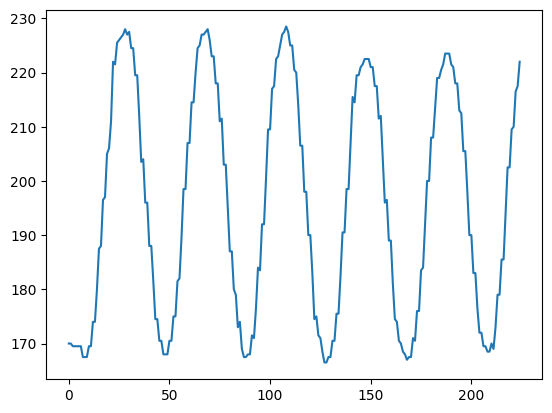

In [48]:
plt.plot(x_y_coordinateMat[1,:])

In [49]:
#We must compute the mean
#we want the mean row to form the mean matrix so that we can subtract it
#from our data matrix to ensure that we work with a zero mean, gaussian matrix


In [50]:
row1_x = x_y_coordinateMat[0,:]
row1_y = x_y_coordinateMat[1,:]
row2_x = x_y_coordinateMat[2,:]
row2_y = x_y_coordinateMat[3,:]
row3_x = x_y_coordinateMat[4,:]
row3_y = x_y_coordinateMat[5,:]

mean1_x = np.mean(row1_x)
mean1_y = np.mean(row1_y)
mean2_x = np.mean(row2_x)
mean2_y = np.mean(row2_y)
mean3_x = np.mean(row3_x)
mean3_y = np.mean(row3_y)

x_y_coordinateMat[0,:] = x_y_coordinateMat[0,:] - mean1_x
x_y_coordinateMat[1,:] = x_y_coordinateMat[1,:] - mean1_y
x_y_coordinateMat[2,:] = x_y_coordinateMat[2,:] - mean2_x
x_y_coordinateMat[3,:] = x_y_coordinateMat[3,:] - mean2_y
x_y_coordinateMat[4,:] = x_y_coordinateMat[4,:] - mean3_x
x_y_coordinateMat[5,:] = x_y_coordinateMat[5,:] - mean3_y

NewcoordMat = x_y_coordinateMat

NewcoordMat

array([[  1.05111111,   0.55111111,   0.55111111, ...,   2.55111111,
          2.55111111,   2.55111111],
       [-25.91555556, -25.91555556, -26.41555556, ...,  20.58444444,
         21.58444444,  26.08444444],
       [ -4.08      ,  -3.58      ,  -4.08      , ...,   0.42      ,
         -0.08      ,  -0.08      ],
       [ 40.54444444,  36.54444444,  32.04444444, ..., -29.45555556,
        -24.95555556, -24.95555556],
       [-14.23333333, -21.23333333, -21.23333333, ...,  16.26666667,
         20.76666667,  21.26666667],
       [  2.64      ,   0.64      ,   0.64      , ...,  -0.86      ,
         -0.86      ,  -0.86      ]])

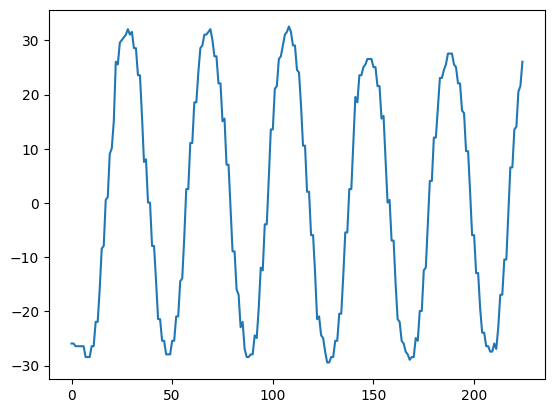

In [51]:
plt.plot(NewcoordMat[1,:])

In [52]:
#Now we proceed to construct the covariance matrix, which allows us to figure out
#which varable are mosst related to each other

covariance = np.cov(NewcoordMat)

In [53]:
covariance

array([[ 2.06322421e+00, -1.40165675e+00, -1.64433036e+00,
        -5.37281746e+00, -2.07172619e+00,  7.64017857e-01],
       [-1.40165675e+00,  4.57097748e+02, -1.34700893e+00,
         1.92964534e+01,  4.42303274e+02,  6.48832143e+01],
       [-1.64433036e+00, -1.34700893e+00,  1.64042857e+01,
        -3.97229911e+01,  5.30379464e+00, -2.83026786e+00],
       [-5.37281746e+00,  1.92964534e+01, -3.97229911e+01,
         8.40102927e+02, -4.57217262e+00,  3.69464286e+00],
       [-2.07172619e+00,  4.42303274e+02,  5.30379464e+00,
        -4.57217262e+00,  4.40779018e+02,  6.34323661e+01],
       [ 7.64017857e-01,  6.48832143e+01, -2.83026786e+00,
         3.69464286e+00,  6.34323661e+01,  1.22403571e+01]])

In [54]:
#We need to diagonalize our covariance matrix to remove redundancies.
#A diagonalized covarance matrix implies that the off diagonals are zeros(it means our variables are independent of each other)

#To this w e will use the SVD method

u,s,vt = np.linalg.svd(NewcoordMat)

vt

array([[-0.04553014, -0.05818891, -0.06072627, ...,  0.0450658 ,
         0.05523576,  0.06301255],
       [ 0.10335458,  0.09652877,  0.08651823, ..., -0.07721239,
        -0.06864451, -0.06995765],
       [ 0.00173417,  0.01891045,  0.02809279, ...,  0.02917718,
         0.0178273 ,  0.03231471],
       ...,
       [-0.05300717,  0.10736849,  0.08302213, ...,  0.93392136,
        -0.06352334, -0.07379698],
       [-0.07244602,  0.0975174 ,  0.06071303, ..., -0.06487974,
         0.93026281, -0.0737946 ],
       [-0.04713569,  0.12755158,  0.0781198 , ..., -0.07348098,
        -0.07215539,  0.91703719]])

In [55]:
#These are our Principle Components (PC's)
ut = u.transpose()

In [56]:
#We can switch to the basis of thw PC's by doing the following:
Y = np.matmul(ut,NewcoordMat)

In [57]:
covarianceY = np.cov(Y)

In [58]:
covarianceY

array([[ 9.02530048e+02, -3.49181002e-13, -2.46152305e-14,
        -1.68500134e-13,  1.28912753e-13,  2.38539347e-14],
       [-3.49181002e-13,  8.40472673e+02,  1.40078425e-13,
        -6.03961325e-14, -2.81679442e-14, -3.76841415e-14],
       [-2.46152305e-14,  1.40078425e-13,  1.69328161e+01,
        -6.74063979e-15,  7.73984051e-15,  3.17206578e-16],
       [-1.68500134e-13, -6.03961325e-14, -6.74063979e-15,
         5.02887094e+00,  2.47896941e-14,  8.16806940e-16],
       [ 1.28912753e-13, -2.81679442e-14,  7.73984051e-15,
         2.47896941e-14,  2.41392601e+00, -1.83979816e-15],
       [ 2.38539347e-14, -3.76841415e-14,  3.17206578e-16,
         8.16806940e-16, -1.83979816e-15,  1.30922598e+00]])

In [59]:
s

array([449.62954828, 433.8961612 ,  61.58693697,  33.56288264,
        23.25337453,  17.12502904])

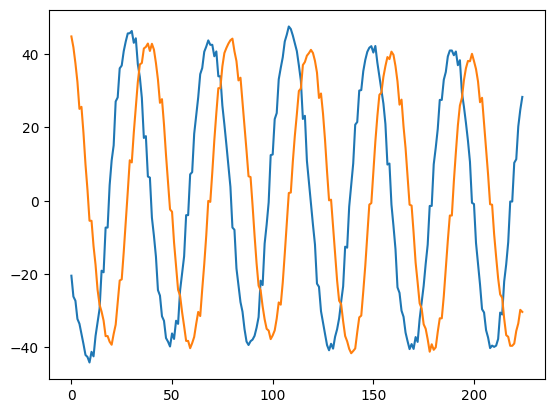

In [60]:
plt.plot(s[0]*vt[0,:])
plt.plot(s[1]*vt[1,:])


In [61]:
#The blue curve is position and the orange curve is its derivative



In [88]:
#SINDy METHOD

!pip install pysindy

In [62]:
import pysindy as ps

In [63]:
NewcoordMat

array([[  1.05111111,   0.55111111,   0.55111111, ...,   2.55111111,
          2.55111111,   2.55111111],
       [-25.91555556, -25.91555556, -26.41555556, ...,  20.58444444,
         21.58444444,  26.08444444],
       [ -4.08      ,  -3.58      ,  -4.08      , ...,   0.42      ,
         -0.08      ,  -0.08      ],
       [ 40.54444444,  36.54444444,  32.04444444, ..., -29.45555556,
        -24.95555556, -24.95555556],
       [-14.23333333, -21.23333333, -21.23333333, ...,  16.26666667,
         20.76666667,  21.26666667],
       [  2.64      ,   0.64      ,   0.64      , ...,  -0.86      ,
         -0.86      ,  -0.86      ]])

In [64]:
coordRedux = (u[:,0:2].transpose())@NewcoordMat

In [65]:
coordRedux.shape

(2, 225)

In [66]:
coordReduxT = coordRedux.transpose()

In [67]:
x = coordReduxT[:,0]
y = coordReduxT[:,1]

In [68]:
featureNames = ['x','y']

In [69]:
opt = ps.STLSQ(threshold = 0.1)

In [70]:
model = ps.SINDy(feature_names =featureNames, optimizer = opt)

In [71]:
model.fit(coordReduxT, t = 11/226)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['x', 'y'],
      optimizer=STLSQ())

In [72]:
model.print()

(x)' = 4.099 1 + -3.262 y
(y)' = -7.161 1 + 3.011 x


In [73]:
#We must integrate to find  (x) and (y)
from scipy.integrate import odeint
def function(z,t):
    a=4.099
    b=-3.262
    c=-7.161
    d=3.011
    dxdt = a + b*z[1]
    dydt = c + d*z[0]
    
    dzdt = [dxdt,dydt]
    return dzdt

In [75]:
#Define your initial condition (its the first row of your projected data)
z0 = [coordReduxT[0,0],coordReduxT[0,1]]

In [76]:
#Time points
t = np.arange(0,11,11/226)

In [77]:
#This will solve the ODE (it will integrate it)
z = odeint(function, z0, t)

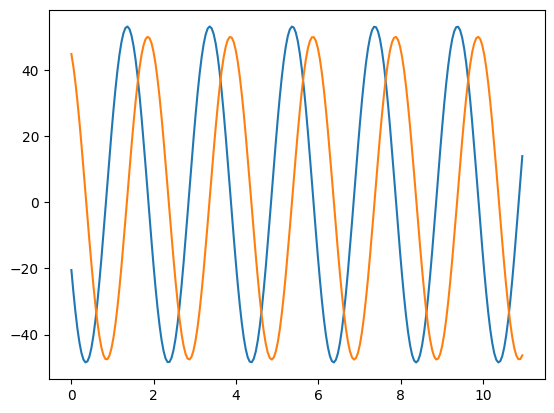

In [78]:
#Now z wiil be a matrix with 2 columns
plt.plot(t,z[:,0]) #this is x(t)
plt.plot(t,z[:,1]) #this is y(t)